Final Project Exploratory Data Analysis 

Import relevant packages

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import time
from datetime import date

%matplotlib inline


Import data

In [3]:
data = r'listings.csv'
pd.set_option('display.max_columns', 500)
AB_Data = pd.read_csv(data)
AB_Data.tail(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3584,14504422,https://www.airbnb.com/rooms/14504422,20160906204935,2016-09-07,(K1) Private Room near Harvard/MIT,My place is close to My home is a warm and fri...,To ensure a smooth check in: 1. You MUST have ...,My place is close to My home is a warm and fri...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/f2b43613-6...,https://a2.muscache.com/im/pictures/f2b43613-6...,https://a2.muscache.com/im/pictures/f2b43613-6...,https://a2.muscache.com/im/pictures/f2b43613-6...,42070843,https://www.airbnb.com/users/show/42070843,Rachel,2015-08-20,"Somerville, Massachusetts, United States",I just moved to the city. I absolutely love it...,within an hour,100%,95%,f,https://a2.muscache.com/im/pictures/9caa4601-0...,https://a2.muscache.com/im/pictures/9caa4601-0...,Somerville,14,14,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Broadway, Somerville, MA 02145, United States",Somerville,Charlestown,NaN,Somerville,MA,02145,Boston,"Somerville, MA",US,United States,42.387888,-71.080654,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Essentials,""trans...",NaN,$65.00,NaN,NaN,NaN,$25.00,1,$30.00,1,1125,today,NaN,17,45,75,165,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,flexible,f,f,3,NaN


There are 95 columns so it would probably be best to identify which ones I will need for my analysis

In [4]:
AB_Clean = AB_Data[['last_scraped','name','summary','space','description','neighborhood_overview','transit','access','house_rules',
                        'host_since','host_about','host_total_listings_count','neighbourhood','zipcode','room_type','accommodates','bathrooms','beds','bed_type','amenities','price','availability_30','availability_60','availability_90','calendar_last_scraped',
                        'number_of_reviews','first_review','last_review', 'review_scores_rating','calculated_host_listings_count','reviews_per_month',
                        'review_scores_checkin']]

AB_Clean.head(2)

,last_scraped,name,summary,space,description,neighborhood_overview,transit,access,house_rules,host_since,host_about,host_total_listings_count,neighbourhood,zipcode,room_type,accommodates,bathrooms,beds,bed_type,amenities,price,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...","The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",Clean up and treat the home the way you'd like...,2015-04-15,We are country and city connecting in our deck...,1,Roslindale,02131,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,0,0,2016-09-06,0,NaN,NaN,NaN,1,NaN,NaN
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,Pet friendly but please confirm with me if the...,2012-06-07,I live in Boston and I like to travel and have...,1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,26,54,84,2016-09-06,36,2014-06-01,2016-08-13,94.0,1,1.3,10.0


Basic EDA on the numeric values

In [5]:
AB_Clean.describe()

,host_total_listings_count,accommodates,bathrooms,beds,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin
count,3585.000000,3585.000000,3571.000000,3576.000000,3585.00000,3585.000000,3585.000000,3585.000000,2772.000000,3585.000000,2829.000000,2765.000000
mean,58.902371,3.041283,1.221647,1.609060,8.64993,21.833194,38.558159,19.044630,91.916667,12.733891,1.970908,9.646293
std,171.119663,1.778929,0.501487,1.011745,10.43533,21.860966,33.158272,35.571658,9.531686,29.415076,2.120561,0.762753
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000,0.010000,2.000000
25%,1.000000,2.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,89.000000,1.000000,0.480000,9.000000
50%,2.000000,2.000000,1.000000,1.000000,4.00000,16.000000,37.000000,5.000000,94.000000,2.000000,1.170000,10.000000
75%,7.000000,4.000000,1.000000,2.000000,15.00000,40.000000,68.000000,21.000000,98.250000,6.000000,2.720000,10.000000
max,749.000000,16.000000,6.000000,16.000000,30.00000,60.000000,90.000000,404.000000,100.000000,136.000000,19.150000,10.000000


Convert price to integer

In [6]:
AB_Clean['price']=AB_Clean['price'].str.replace(',', '')
AB_Clean['price_int']=AB_Clean['price'].str.replace('$', '')

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
AB_Clean.head()

,last_scraped,name,summary,space,description,neighborhood_overview,transit,access,house_rules,host_since,host_about,host_total_listings_count,neighbourhood,zipcode,room_type,accommodates,bathrooms,beds,bed_type,amenities,price,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin,price_int
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...","The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",Clean up and treat the home the way you'd like...,2015-04-15,We are country and city connecting in our deck...,1,Roslindale,02131,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,0,0,2016-09-06,0,NaN,NaN,NaN,1,NaN,NaN,250.00
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,Pet friendly but please confirm with me if the...,2012-06-07,I live in Boston and I like to travel and have...,1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,26,54,84,2016-09-06,36,2014-06-01,2016-08-13,94.0,1,1.30,10.0,65.00
2,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","I encourage you to use my kitchen, cooking and...",2009-05-11,"I am a middle-aged, single male with a wide ra...",1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,19,46,61,2016-09-06,41,2009-07-19,2016-08-05,98.0,1,0.47,10.0,65.00
3,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,- The bathroom and house are shared so please ...,2013-04-21,My husband and I live on the property. He’s a...,1,NaN,NaN,Private room,4,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,6,16,26,2016-09-06,1,2016-08-28,2016-08-28,100.0,1,1.00,10.0,75.00
4,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",From Logan Airport and South Station you have...,You will have access to the front and side por...,"Please no smoking in the house, porch or on th...",2014-05-11,I work full time for a public school district....,1,Roslindale,02131,Private room,2,1.5,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,13,34,59,2016-09-06,29,2015-08-18,2016-09-01,99.0,1,2.25,10.0,79.00


In [8]:
AB_Clean['price_int'] = pd.to_numeric(AB_Clean['price_int'])

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
AB_Clean['price_int'].dtypes

dtype('float64')

I calculated the price per bed to account for listings of different sizes. 

In [10]:
AB_Clean['price_bed']=AB_Clean.price_int / AB_Clean.beds
AB_Clean.head()

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,last_scraped,name,summary,space,description,neighborhood_overview,transit,access,house_rules,host_since,host_about,host_total_listings_count,neighbourhood,zipcode,room_type,accommodates,bathrooms,beds,bed_type,amenities,price,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin,price_int,price_bed
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...","The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",Clean up and treat the home the way you'd like...,2015-04-15,We are country and city connecting in our deck...,1,Roslindale,02131,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,0,0,2016-09-06,0,NaN,NaN,NaN,1,NaN,NaN,250.0,83.333333
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,Pet friendly but please confirm with me if the...,2012-06-07,I live in Boston and I like to travel and have...,1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,26,54,84,2016-09-06,36,2014-06-01,2016-08-13,94.0,1,1.30,10.0,65.0,65.000000
2,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","I encourage you to use my kitchen, cooking and...",2009-05-11,"I am a middle-aged, single male with a wide ra...",1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,19,46,61,2016-09-06,41,2009-07-19,2016-08-05,98.0,1,0.47,10.0,65.0,65.000000
3,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,- The bathroom and house are shared so please ...,2013-04-21,My husband and I live on the property. He’s a...,1,NaN,NaN,Private room,4,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,6,16,26,2016-09-06,1,2016-08-28,2016-08-28,100.0,1,1.00,10.0,75.0,37.500000
4,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",From Logan Airport and South Station you have...,You will have access to the front and side por...,"Please no smoking in the house, porch or on th...",2014-05-11,I work full time for a public school district....,1,Roslindale,02131,Private room,2,1.5,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,13,34,59,2016-09-06,29,2015-08-18,2016-09-01,99.0,1,2.25,10.0,79.0,39.500000


In [11]:
AB_Clean.dtypes


last_scraped                       object
name                               object
summary                            object
space                              object
description                        object
neighborhood_overview              object
transit                            object
access                             object
house_rules                        object
host_since                         object
host_about                         object
host_total_listings_count           int64
neighbourhood                      object
zipcode                            object
room_type                          object
accommodates                        int64
bathrooms                         float64
beds                              float64
bed_type                           object
amenities                          object
price                              object
availability_30                     int64
availability_60                     int64
availability_90                   

This shows that all the data types for this column are integers, and I want them to be datetime

In [12]:
AB_Clean['host_since'].apply(type).value_counts()

<class 'str'>    3585
Name: host_since, dtype: int64

In [13]:
AB_Clean['host_since']=pd.to_datetime(AB_Clean['host_since'])
AB_Clean['last_scraped']=pd.to_datetime(AB_Clean['last_scraped'])
AB_Clean['host_since'].apply(type).value_counts()

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas._libs.tslibs.timestamps.Timestamp'>    3585
Name: host_since, dtype: int64

Another important factor to consider will be the amount of time someone has been a host.
I'll use the datetime tools to calculate amount of time they have been a host.

In [14]:
AB_Clean['Host_Age']=AB_Clean.last_scraped - AB_Clean.host_since

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
AB_Clean.head(3)

,last_scraped,name,summary,space,description,neighborhood_overview,transit,access,house_rules,host_since,host_about,host_total_listings_count,neighbourhood,zipcode,room_type,accommodates,bathrooms,beds,bed_type,amenities,price,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin,price_int,price_bed,Host_Age
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...","The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",Clean up and treat the home the way you'd like...,2015-04-15,We are country and city connecting in our deck...,1,Roslindale,02131,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,0,0,2016-09-06,0,NaN,NaN,NaN,1,NaN,NaN,250.0,83.333333,511 days
1,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,Pet friendly but please confirm with me if the...,2012-06-07,I live in Boston and I like to travel and have...,1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,26,54,84,2016-09-06,36,2014-06-01,2016-08-13,94.0,1,1.30,10.0,65.0,65.000000,1553 days
2,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","I encourage you to use my kitchen, cooking and...",2009-05-11,"I am a middle-aged, single male with a wide ra...",1,Roslindale,02131,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,19,46,61,2016-09-06,41,2009-07-19,2016-08-05,98.0,1,0.47,10.0,65.0,65.000000,2676 days


Since my dependent variable in this project is the reviews per month category I am going to go ahead and remove entries that do not have values for this field. 

In [16]:
# show number of rows that have missing review per month field
null_var = AB_Clean['reviews_per_month'].isnull().sum()
#print(AB_Clean[null_var])
null_var

756

In [17]:
# remove rows with no reviews per month field and set inplace to true to maintain the variable
[AB_Clean.dropna(subset=['reviews_per_month'],inplace=True)]
AB_Clean.shape

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2829, 35)

#### Since there is a severe left skew to my data I am going to check out the number or entries with reviews per month that are less than 1, and consider fitting this to a logistic regression vs. a linear regression. 

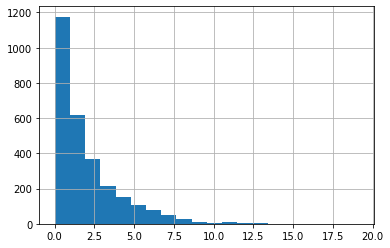

In [43]:
# create histogram to view what the dependent variable's distribution looks like. 
AB_Clean['reviews_per_month'].hist(bins=20)

In [68]:
AB_rpm_1=AB_Clean[AB_Clean['reviews_per_month']<=1]
AB_rpm_1_plus=AB_Clean[AB_Clean['reviews_per_month']>=1]


len(AB_Clean)
len(AB_rpm_1)
len(AB_rpm_1_plus)

f"There are {len(AB_Clean)} entries in the data set, {len(AB_rpm_1)} of the entries have less than 1 review per month, and {len(AB_rpm_1_plus)}
have greater than 1 review per month."

SyntaxError: EOL while scanning string literal (<ipython-input-68-7f4e27b4ff7b>, line 6)

Next I want to create a pairplot showing all of the numeric features that I'd like to include in my analysis. The first step in this will be two change the host age column into numeric.

In [18]:
#change Host_Age variable into a numeric value 
AB_Clean['Host_Age'] = (AB_Clean['Host_Age']).astype(str)
#AB_Clean['Host_Age'] = AB_Clean['Host_Age'].str.replace(' days', '')
AB_Clean['Host_Age'].head(10)

C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1     1553 days 00:00:00.000000000
2     2676 days 00:00:00.000000000
3     1235 days 00:00:00.000000000
4      850 days 00:00:00.000000000
5      168 days 00:00:00.000000000
6     1201 days 00:00:00.000000000
7     1494 days 00:00:00.000000000
8     1414 days 00:00:00.000000000
9     1359 days 00:00:00.000000000
10     167 days 00:00:00.000000000
Name: Host_Age, dtype: object

I will then remove the last 23 characters so that we only have the number of days. 

In [19]:
AB_Clean['Host_Age']=AB_Clean['Host_Age'].str.replace(' days 00:00:00.000000000','')
AB_Clean['Host_Age']=pd.to_numeric(AB_Clean['Host_Age'])
AB_Clean['Host_Age'].head(10)


C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3_v2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1     1553
2     2676
3     1235
4      850
5      168
6     1201
7     1494
8     1414
9     1359
10     167
Name: Host_Age, dtype: int64

In [20]:
# create data frame of just the quantitative variables in the data
#AB_Clean_Quant = AB_Clean['accommodates','Host_Age','beds','bathrooms','number_of_reviews','reviews_per_month','price_bed']
AB_Clean_Quant=AB_Clean.select_dtypes(exclude=['object','datetime64[ns]'])
AB_Clean_Quant.dtypes

host_total_listings_count           int64
accommodates                        int64
bathrooms                         float64
beds                              float64
availability_30                     int64
availability_60                     int64
availability_90                     int64
number_of_reviews                   int64
review_scores_rating              float64
calculated_host_listings_count      int64
reviews_per_month                 float64
review_scores_checkin             float64
price_int                         float64
price_bed                         float64
Host_Age                            int64
dtype: object

In [37]:
AB_Clean_Quant.loc[AB_Clean_Quant['price_bed'] == np.inf, 'price_bed'] = AB_Clean_Quant.price_int
AB_Clean_Quant.price_bed.fillna(AB_Clean_Quant.price_int, inplace=True)


C:\Users\Admin\anaconda3_v2\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Admin\anaconda3_v2\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
AB_Clean_Quant.sort_values(by='price_bed', ascending=False)
#AB_Clean_Quant[AB_Clean_Quant['price_bed']==199] and [AB_Clean_Quant['beds']==0]

,host_total_listings_count,accommodates,bathrooms,beds,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin,price_int,price_bed,Host_Age
379,5,12,1.0,1.0,2,22,52,7,70.0,2,0.13,8.0,525.0,525.000000,2191
1073,6,1,0.0,1.0,30,60,90,26,94.0,6,0.65,9.0,500.0,500.000000,1687
1969,1,2,1.0,1.0,30,60,90,7,74.0,1,0.24,8.0,499.0,499.000000,1120
1832,1,2,1.0,1.0,30,60,90,19,87.0,1,0.53,10.0,425.0,425.000000,1610
2148,2,2,1.5,1.0,11,41,71,3,100.0,1,0.29,10.0,425.0,425.000000,658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,4,5,1.0,5.0,17,42,72,11,84.0,1,3.79,9.0,80.0,16.000000,385
2674,3,4,1.5,4.0,17,35,65,163,93.0,1,4.10,9.0,60.0,15.000000,1422
2294,1,10,1.0,16.0,0,0,0,8,93.0,1,1.69,10.0,229.0,14.312500,1734
479,1,1,1.0,3.0,0,0,0,2,100.0,1,0.15,10.0,40.0,13.333333,635


In [40]:
AB_Clean_Quant.tail()

,host_total_listings_count,accommodates,bathrooms,beds,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,review_scores_checkin,price_int,price_bed,Host_Age
3574,2,1,1.0,1.0,28,58,88,1,80.0,2,1.00,8.0,68.0,68.0,13
3575,28,2,1.0,1.0,25,51,81,6,70.0,8,0.33,9.0,69.0,69.0,769
3578,4,1,1.0,1.0,4,16,44,2,100.0,2,2.00,10.0,85.0,85.0,81
3580,28,3,1.0,1.0,21,51,81,4,90.0,8,0.34,10.0,69.0,69.0,769
3583,4,2,1.0,1.0,5,5,5,2,90.0,1,2.00,9.0,65.0,65.0,103


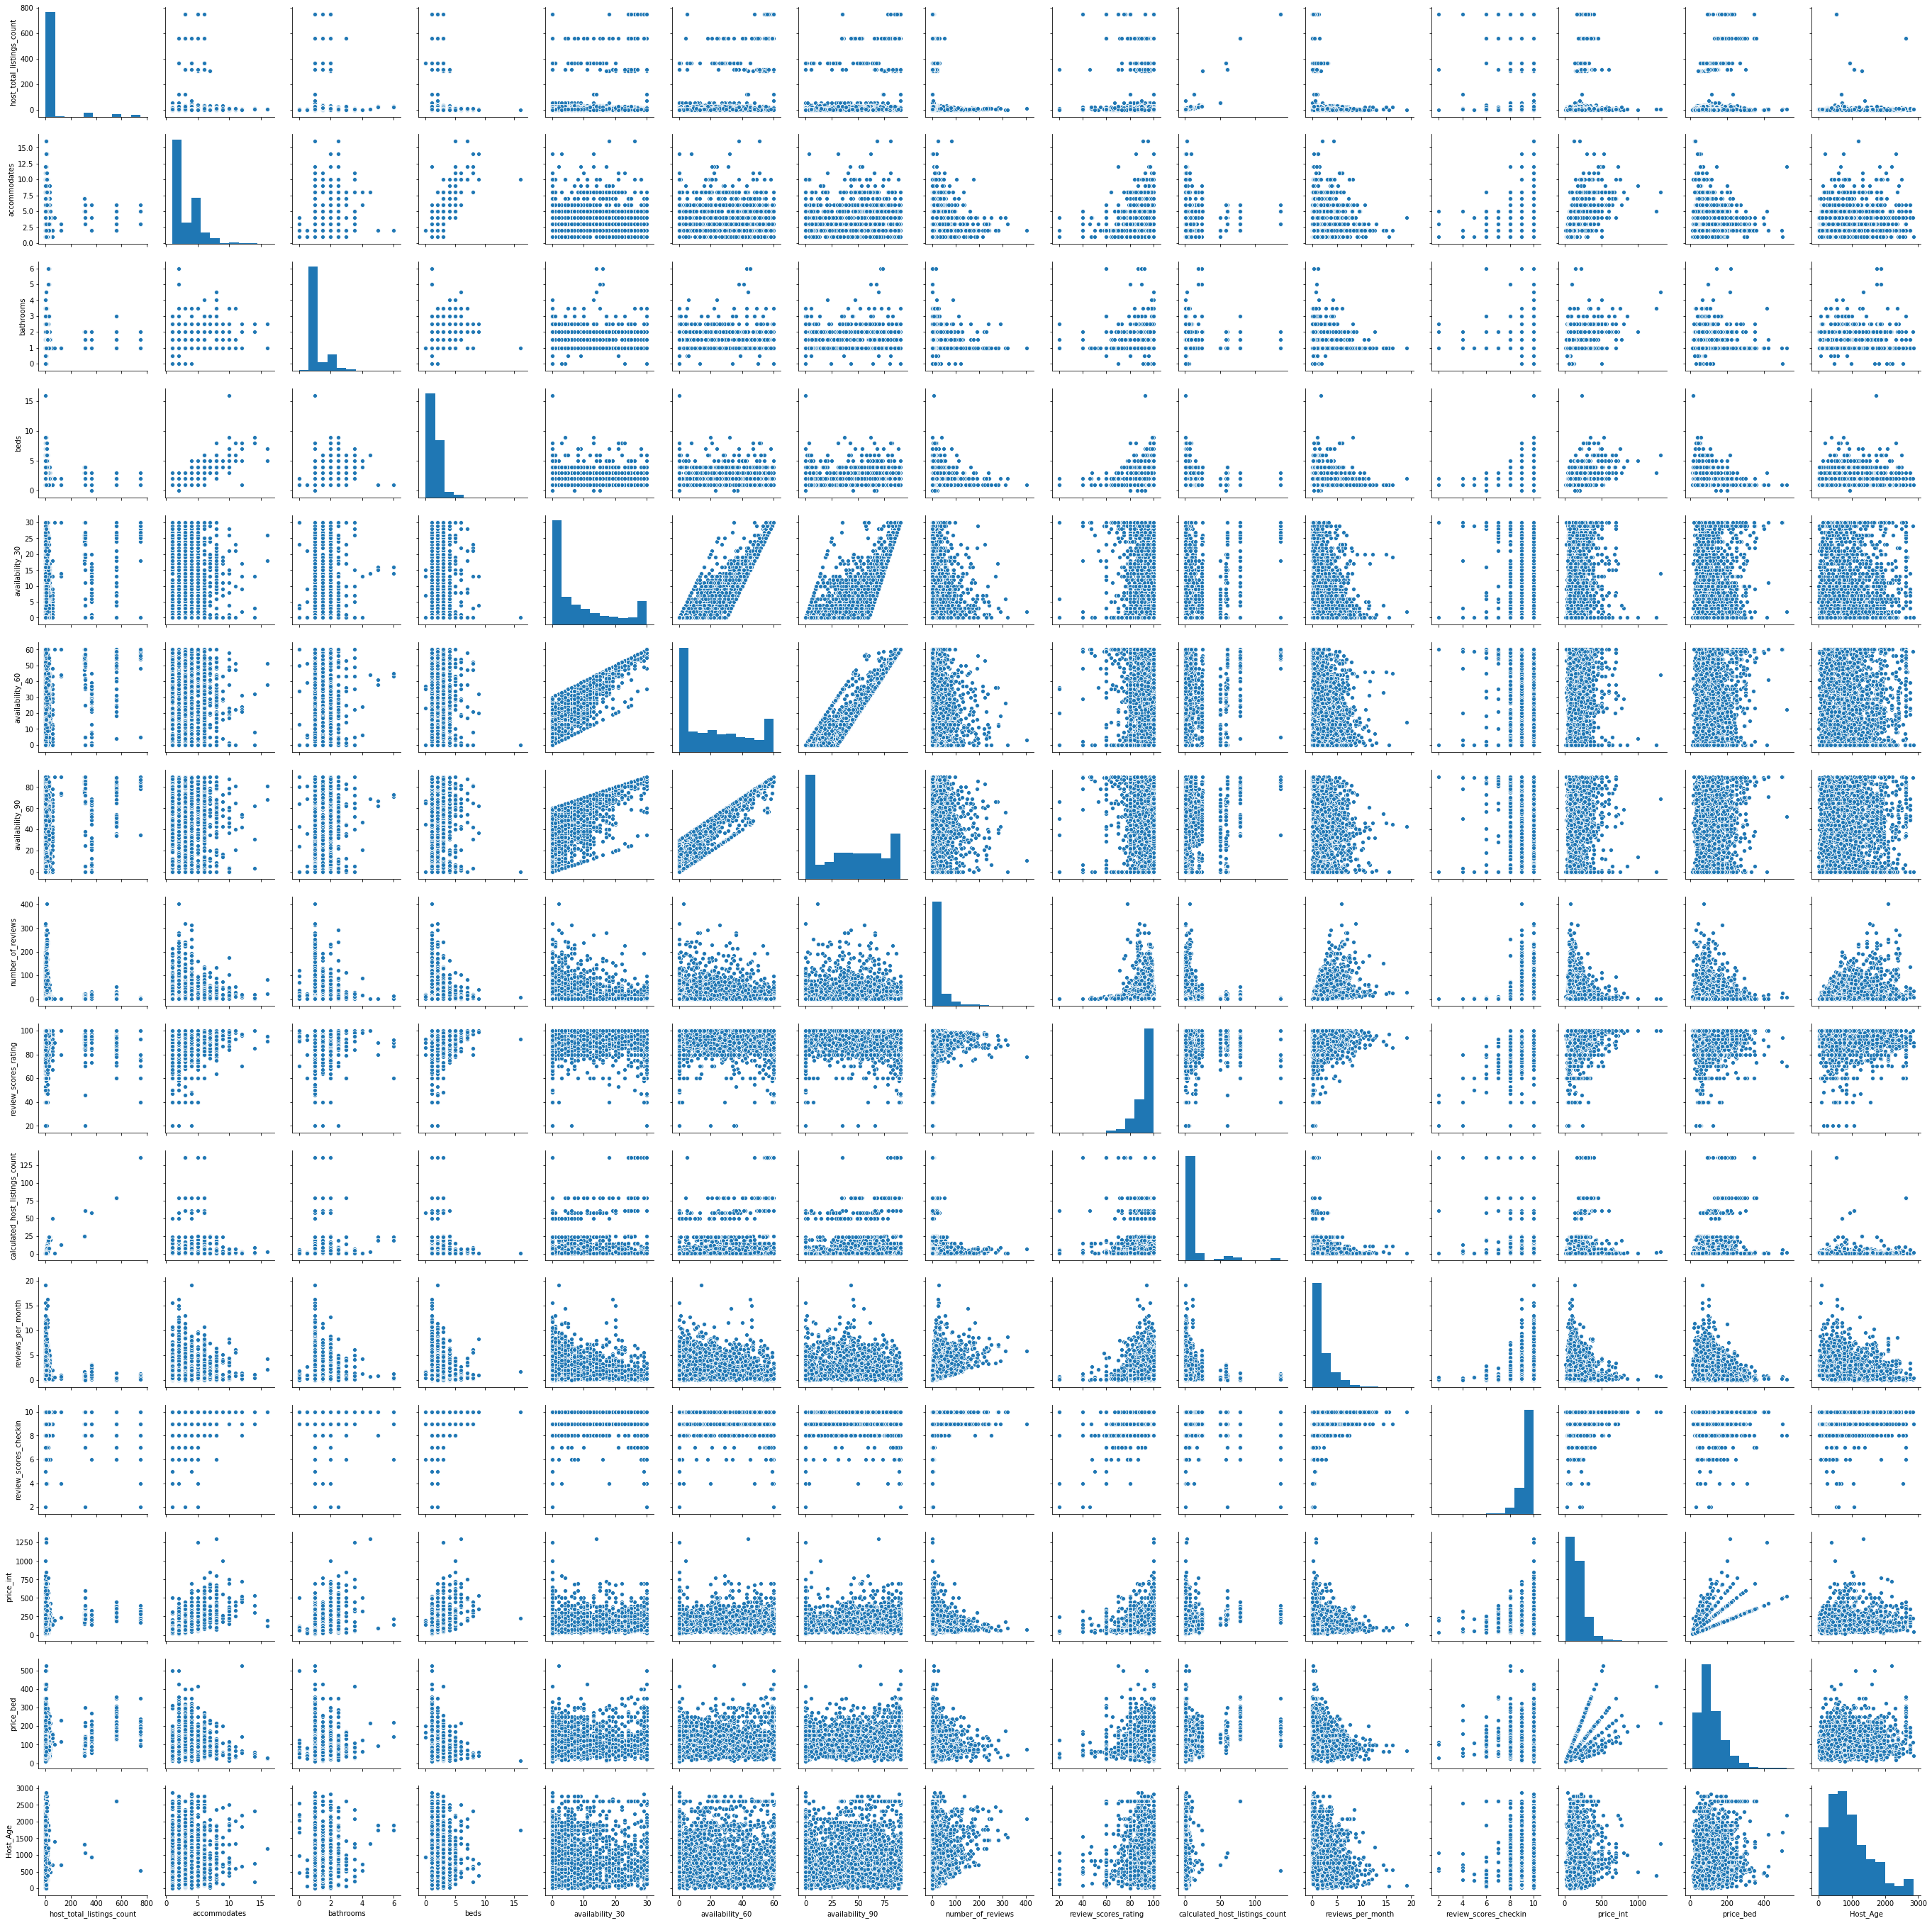

In [41]:
sns.pairplot(AB_Clean_Quant)

I would like to create a bar graph showing all of the most used words in each text column. I was not able to complete this by the time class started. 

In [69]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
text1 = AB_Clean['description'].apply(word_tokenize)
#AB_Clean['description'] = AB_Clean['description'].apply(lambda x: np.array(x))
print(text)

1       [Charming, and, quiet, room, in, a, second, fl...
2       [Come, stay, with, a, friendly, ,, middle-aged...
3       [Come, experience, the, comforts, of, home, aw...
4       [My, comfy, ,, clean, and, relaxing, home, is,...
5       [Super, comfy, bedroom, plus, your, own, bathr...
                              ...                        
3574    [我的房源走路2, minutes有shopping, mall, ,, 包括CVS, ,,...
3575    [Cozy, room, near, T, station, ., 5, min, walk...
3578    [Exquisite, garden, level, (, semi, basement, ...
3580    [5, min, walking, to, Orange, Line, subway, wi...
3583    [My, place, is, close, to, Taco, Loco, Mexican...
Name: description, Length: 2829, dtype: object


In [68]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = text.split()
for token in text:
    if token in stopwords.words('english'):
        clean_tokens.remove(text)
        
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
    
freq.plot(20, cumulative=False)


AttributeError: 'Series' object has no attribute 'split'